In [ ]:
from AZOG.reactor import Reactor_Core
from AZOG.pressurizer import Pressurizer
from AZOG.logo import logo
import numpy as np 
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI
from tqdm import tqdm

In [ ]:
reactor=Reactor_Core(TemperatureFuel=np.linspace(800,810,num=5)+273.16,TemperatureModerator=np.linspace(310,320,num=10)+273.16,Power=1000e6,Precursor=2000,Pressure=15e6,Temp_hotleg=325+273.16,Temp_coldleg=300+273.16,Temp_lowerplenum=305+273.16,Temp_upplerplenum=322+273.16)
pressurizer=Pressurizer(pressurizer_diameter=2,Pressure=1.5e7,Temp_coldleg=450)

In [ ]:
reactor.total_delayed_const/(reactor.NGT*reactor.Lamda)


In [ ]:
import xlsxwriter 
work_book1=xlsxwriter.Workbook('test_case_pressurizer.excel')
data_sheet1=work_book1.add_worksheet("test")

row=0
data_sheet1.write(0,0,'T')
data_sheet1.write(0,1,'P')
data_sheet1.write(0,2,'Lw')

In [ ]:
import xlsxwriter 
work_book2=xlsxwriter.Workbook('test_case_reactor_a.excel')
data_sheet2=work_book2.add_worksheet("test")

row=0
data_sheet2.write(row,0,'T')
data_sheet2.write(row,1,'Tf1')
data_sheet2.write(row,2,'Tf2')
data_sheet2.write(row,3,'Tf3')
data_sheet2.write(row,4,'Tf4')
data_sheet2.write(row,5,'Tf5')

data_sheet2.write(row,6,'Tmo1')
data_sheet2.write(row,7,'Tmo2')
data_sheet2.write(row,8,'Tmo3')
data_sheet2.write(row,9,'Tmo4')
data_sheet2.write(row,10,'Tmo5')
data_sheet2.write(row,11,'Tmo6')
data_sheet2.write(row,12,'Tmo7')
data_sheet2.write(row,13,'Tmo8')
data_sheet2.write(row,14,'Tmo9')
data_sheet2.write(row,15,'Tmo10')
data_sheet2.write(row,16,'Power')
data_sheet2.write(row,17,'Thl')
data_sheet2.write(row,18,'Tcl')
data_sheet2.write(row,19,'Tlp')
data_sheet2.write(row,20,'Tup')
data_sheet2.write(row,21,'Precursor')
data_sheet2.write(row,22,'Reactivity')

In [26]:
Simulation_time=500
dt=0.001

row=1
t=np.linspace(0,Simulation_time,num=int(Simulation_time/dt))
tim=0
print("Simulation running... ... ..\n")
for i in tqdm(range(len(t))):


    PowerRatio=reactor.integrator(reactor.DPowerRatio,argsforfunction=[],intitial_cond=reactor.PowerRatio,time_step=dt)
    Precursor=reactor.integrator(reactor.DPrecoursor,argsforfunction=[],intitial_cond=reactor.Precursor,time_step=dt)
    #print(PowerRatio)

    Tf1=reactor.integrator(reactor.DTf1,argsforfunction=[],intitial_cond=reactor.Tf1,time_step=dt)
    Tf2=reactor.integrator(reactor.DTf2,argsforfunction=[],intitial_cond=reactor.Tf2,time_step=dt)
    Tf3=reactor.integrator(reactor.DTf3,argsforfunction=[],intitial_cond=reactor.Tf3,time_step=dt)
    Tf4=reactor.integrator(reactor.DTf4,argsforfunction=[],intitial_cond=reactor.Tf4,time_step=dt)
    Tf5=reactor.integrator(reactor.DTf5,argsforfunction=[],intitial_cond=reactor.Tf5,time_step=dt)

    Tmo1=reactor.integrator(reactor.DTmo1,argsforfunction=[],intitial_cond=reactor.Tmo1,time_step=dt)
    Tmo2=reactor.integrator(reactor.DTmo2,argsforfunction=[],intitial_cond=reactor.Tmo2,time_step=dt)
    Tmo3=reactor.integrator(reactor.DTmo3,argsforfunction=[],intitial_cond=reactor.Tmo3,time_step=dt)
    Tmo4=reactor.integrator(reactor.DTmo4,argsforfunction=[],intitial_cond=reactor.Tmo4,time_step=dt)
    Tmo5=reactor.integrator(reactor.DTmo5,argsforfunction=[],intitial_cond=reactor.Tmo5,time_step=dt)
    Tmo6=reactor.integrator(reactor.DTmo6,argsforfunction=[],intitial_cond=reactor.Tmo6,time_step=dt)
    Tmo7=reactor.integrator(reactor.DTmo7,argsforfunction=[],intitial_cond=reactor.Tmo7,time_step=dt)
    Tmo8=reactor.integrator(reactor.DTmo8,argsforfunction=[],intitial_cond=reactor.Tmo8,time_step=dt)
    Tmo9=reactor.integrator(reactor.DTmo9,argsforfunction=[],intitial_cond=reactor.Tmo9,time_step=dt)
    Tmo10=reactor.integrator(reactor.DTmo10,argsforfunction=[],intitial_cond=reactor.Tmo10,time_step=dt)

    Thl=reactor.integrator(reactor.DThl,argsforfunction=[],intitial_cond=reactor.Thl,time_step=dt)
    Tcl=reactor.integrator(reactor.DTcl,argsforfunction=[380],intitial_cond=reactor.Tcl,time_step=dt)
    Tlp=reactor.integrator(reactor.DTlp,argsforfunction=[],intitial_cond=reactor.Tlp,time_step=dt)
    Tup=reactor.integrator(reactor.DTup,argsforfunction=[],intitial_cond=reactor.Tup,time_step=dt)

    fuel_temp=Tf1+Tf2+Tf3+Tf4+Tf5
    mod_temp=Tmo1+Tmo2+Tmo3+Tmo4+Tmo5+Tmo6+Tmo7+Tmo8+Tmo9+Tmo10

    reactor.Reactivity(FuelTempSum=fuel_temp,ModeratorTempSum=mod_temp)

    modarray=[reactor.DTcl(380),reactor.DTlp(),reactor.DTmo1(),reactor.DTmo2(),reactor.DTmo3(),reactor.DTmo4(),reactor.DTmo5(),reactor.DTmo6(),reactor.DTmo7(),reactor.DTmo8(),reactor.DTmo9(),reactor.DTmo10(),reactor.DTup(),reactor.DThl()]

    pressurizer.Pressure=pressurizer.integrator(pressurizer.DPp,argsforfunction=[modarray,reactor.Tcl],intitial_cond=pressurizer.Pressure,time_step=dt)
    pressurizer.l_w=pressurizer.integrator(pressurizer.Dlw,argsforfunction=[modarray,reactor.Tcl],intitial_cond=pressurizer.l_w,time_step=dt)

    reactor.PowerRatio=PowerRatio
    reactor.Precursor=Precursor
    reactor.Tf1=Tf1
    reactor.Tf2=Tf2
    reactor.Tf3=Tf3
    reactor.Tf4=Tf4
    reactor.Tf5=Tf5
    
    reactor.Tmo1=Tmo1
    reactor.Tmo2=Tmo2
    reactor.Tmo3=Tmo3
    reactor.Tmo4=Tmo4
    reactor.Tmo5=Tmo5
    reactor.Tmo6=Tmo6
    reactor.Tmo7=Tmo7
    reactor.Tmo8=Tmo8
    reactor.Tmo9=Tmo9
    reactor.Tmo10=Tmo10

    reactor.Thl=Thl
    reactor.Tup=Tup
    reactor.Tlp=Tcl
    reactor.Tcl=Tcl

    if tim>200 and tim<250:
        reactor.ExternalReactivity=0.001
    elif tim>300 and tim<350:
        reactor.ExternalReactivity=-0.0001
    else:
        reactor.ExternalReactivity=0
    
    if (i%1000)==0:
        data_sheet2.write(row,0,t[i])
        
        data_sheet2.write(row,1,Tf1)
        data_sheet2.write(row,2,Tf2)
        data_sheet2.write(row,3,Tf3)
        data_sheet2.write(row,4,Tf4)
        data_sheet2.write(row,5,Tf5)

        data_sheet2.write(row,6,Tmo1)
        data_sheet2.write(row,7,Tmo2)
        data_sheet2.write(row,8,Tmo3)
        data_sheet2.write(row,9,Tmo4)
        data_sheet2.write(row,10,Tmo5)
        data_sheet2.write(row,11,Tmo6)
        data_sheet2.write(row,12,Tmo7)
        data_sheet2.write(row,13,Tmo8)
        data_sheet2.write(row,14,Tmo9)
        data_sheet2.write(row,15,Tmo10)
        data_sheet2.write(row,16,reactor.PowerRatio)
        data_sheet2.write(row,17,Thl)
        data_sheet2.write(row,18,Tcl)
        data_sheet2.write(row,19,Tlp)
        data_sheet2.write(row,20,Tup)
        data_sheet2.write(row,21,reactor.Precursor)
        data_sheet2.write(row,22,reactor.reactivity)

        data_sheet1.write(row,0,t[i])
        data_sheet1.write(row,1,pressurizer.Pressure)
        data_sheet1.write(row,2,pressurizer.l_w)
        row=row+1

    tim=tim+dt
work_book1.close()
work_book2.close()

100%|██████████| 500000/500000 [1:10:48<00:00, 117.69it/s]


In [27]:
path='/media/ebny_walid/New Volume/Thesis/thesis_final_code/test_case_reactor_a.excel'
from pandas import read_excel
data1=read_excel(path)
data1.head(-10)

,T,Tf1,Tf2,Tf3,Tf4,Tf5,Tmo1,Tmo2,Tmo3,Tmo4,...,Tmo8,Tmo9,Tmo10,Power,Thl,Tcl,Tlp,Tup,Precursor,Reactivity
0,0.000000,1073.256842,1075.756759,1078.256676,1080.756593,1083.256510,583.471543,584.669042,585.780383,586.891494,...,591.336398,592.447739,593.558850,0.943423,598.158985,573.094649,578.091468,595.158557,2000.056555,-6.344073e-07
1,1.000002,1093.410398,1105.635176,1116.411077,1125.857746,1134.091271,540.828975,563.936845,585.753370,607.493941,...,686.599956,704.481083,722.241480,0.708809,605.292201,517.661197,517.707788,652.905840,1997.259317,-2.309257e-04
2,2.000004,1092.589906,1113.582333,1132.889192,1150.601332,1166.809962,502.144358,526.124837,549.103746,572.046744,...,657.629123,677.489899,697.280015,0.696370,624.150967,478.141535,478.174750,681.192788,1990.548998,-3.263491e-04
3,3.000006,1081.881642,1109.709838,1135.825795,1160.287775,1183.157098,474.198935,498.428465,521.905324,545.369024,...,634.481574,655.549807,676.575410,0.692088,641.238471,449.967145,449.990824,683.335082,1982.725972,-3.411317e-04
4,4.000008,1067.447066,1100.433170,1131.808470,1161.601026,1189.843458,454.029951,478.186434,501.792174,525.397044,...,616.266342,638.050976,659.810793,0.692107,652.183797,429.881035,429.897917,674.884924,1975.109119,-3.148850e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485.000970,989.905525,1034.781401,1079.657226,1124.533000,1169.408722,402.438174,424.876346,447.314498,469.752648,...,559.505117,581.943202,604.381283,0.721945,604.378309,380.000000,380.000000,604.380401,1963.654902,3.360080e-07
486,486.000972,989.907104,1034.783112,1079.659070,1124.534980,1169.410840,402.438232,424.876462,447.314673,469.752882,...,559.505591,581.943736,604.381879,0.721947,604.379005,380.000000,380.000000,604.381027,1963.662850,3.246879e-07
487,487.000974,989.908630,1034.784765,1079.660853,1124.536893,1169.412886,402.438288,424.876574,447.314842,469.753108,...,559.506048,581.944253,604.382454,0.721948,604.379677,380.000000,380.000000,604.381631,1963.670529,3.137491e-07
488,488.000976,989.910105,1034.786363,1079.662576,1124.538742,1169.414863,402.438343,424.876683,447.315006,469.753326,...,559.506490,581.944752,604.383011,0.721950,604.380327,380.000000,380.000000,604.382215,1963.677950,3.031789e-07


Text(0, 0.5, 'Transient Power Factor')

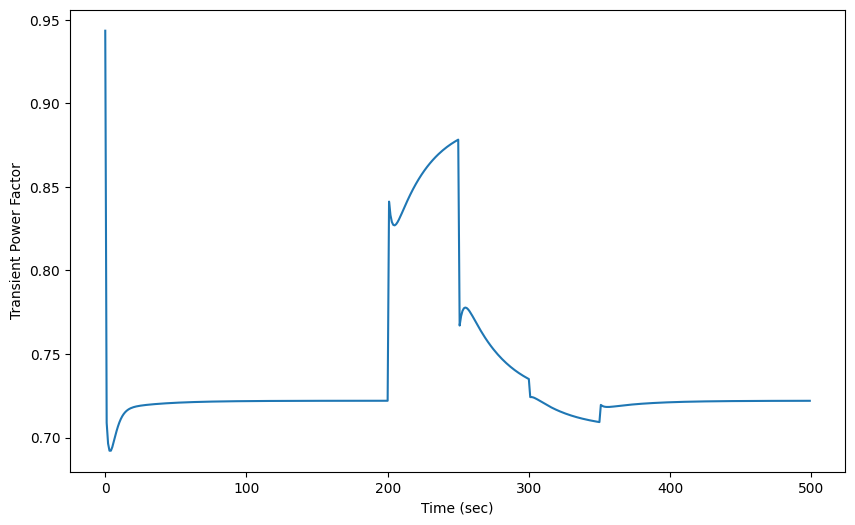

In [28]:

plt.figure(figsize=(10,6))
plt.plot(data1['T'],data1['Power'])

plt.xlabel("Time (sec)")
plt.ylabel('Transient Power Factor')

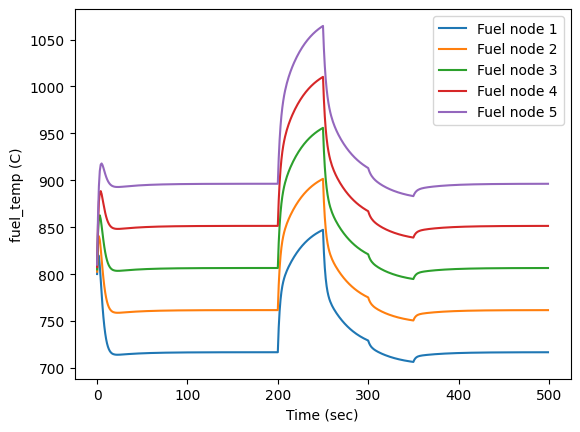

In [29]:

plt.plot(np.array(data1["T"]),np.array(data1["Tf1"])-273.16)
plt.plot(np.array(data1["T"]),np.array(data1["Tf2"])-273.16 )
plt.plot(np.array(data1["T"]),np.array(data1["Tf3"])-273.16 )
plt.plot(np.array(data1["T"]),np.array(data1["Tf4"])-273.16 )
plt.plot(np.array(data1["T"]),np.array(data1["Tf5"])-273.16 )


plt.legend(['Fuel node 1','Fuel node 2','Fuel node 3','Fuel node 4','Fuel node 5','Fuel node 1','Fuel node 2','Fuel node 3','Fuel node 4','Fuel node 5'])
plt.xlabel('Time (sec)')
plt.ylabel("fuel_temp (C)")

TEMP=(np.array(data1["Tf1"])+np.array(data1["Tf2"])+np.array(data1["Tf3"])+np.array(data1["Tf4"])+np.array(data1["Tf5"]))

In [30]:
np.average(np.array(data1["Tf1"])+np.array(data1["Tf2"])+np.array(data1["Tf3"])+np.array(data1["Tf4"])+np.array(data1["Tf5"]))


5477.190146933905

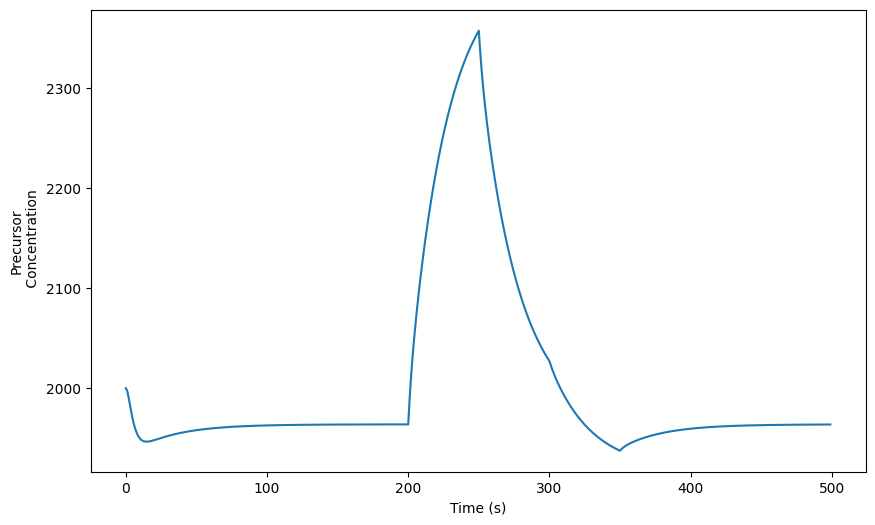

In [31]:

plt.figure(figsize=(10,6))
plt.plot(data1['T'],data1['Precursor'])
plt.ylabel("Precursor\n Concentration")
plt.xlabel("Time (s)")

resolution_value = 300
plt.savefig("myImage.png", format="png", dpi=resolution_value)

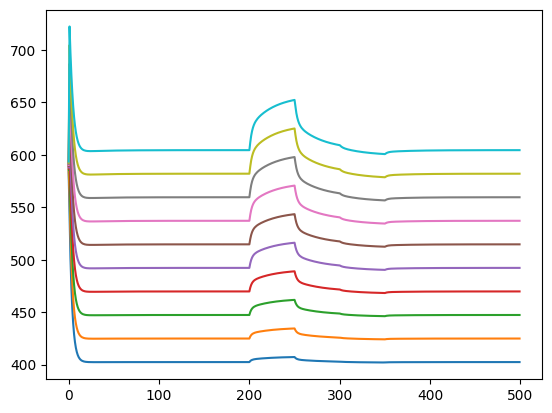

In [32]:


plt.plot(data1['T'],data1['Tmo1'])
plt.plot(data1['T'],data1['Tmo2'])
plt.plot(data1['T'],data1['Tmo3'])
plt.plot(data1['T'],data1['Tmo4'])
plt.plot(data1['T'],data1['Tmo5'])
plt.plot(data1['T'],data1['Tmo6'])
plt.plot(data1['T'],data1['Tmo7'])
plt.plot(data1['T'],data1['Tmo8'])
plt.plot(data1['T'],data1['Tmo9'])
plt.plot(data1['T'],data1['Tmo10'])

Text(0, 0.5, 'Reactivity, $\\rho$')

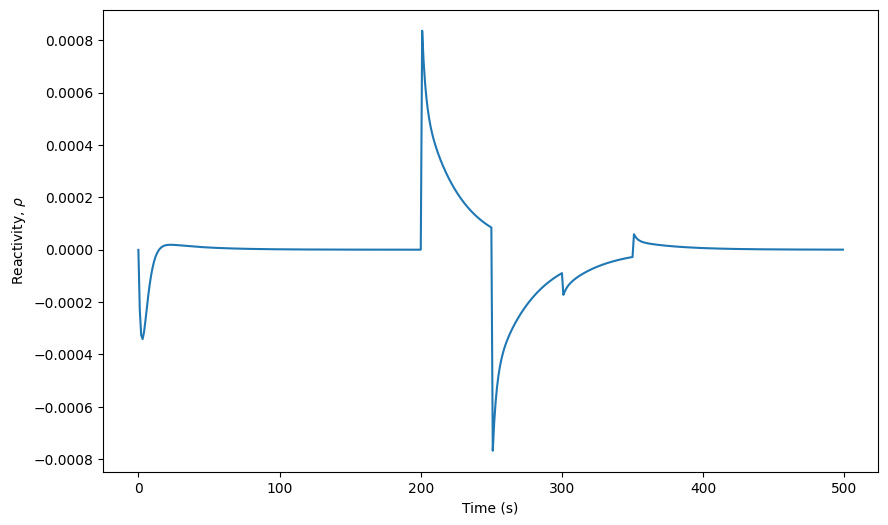

In [33]:

plt.figure(figsize=(10,6))
plt.plot(data1['T'],data1['Reactivity'])
plt.xlabel("Time (s)")
plt.ylabel(r"Reactivity, $\rho$")

Text(0, 0.5, 'Average fuel temperature, $C$')

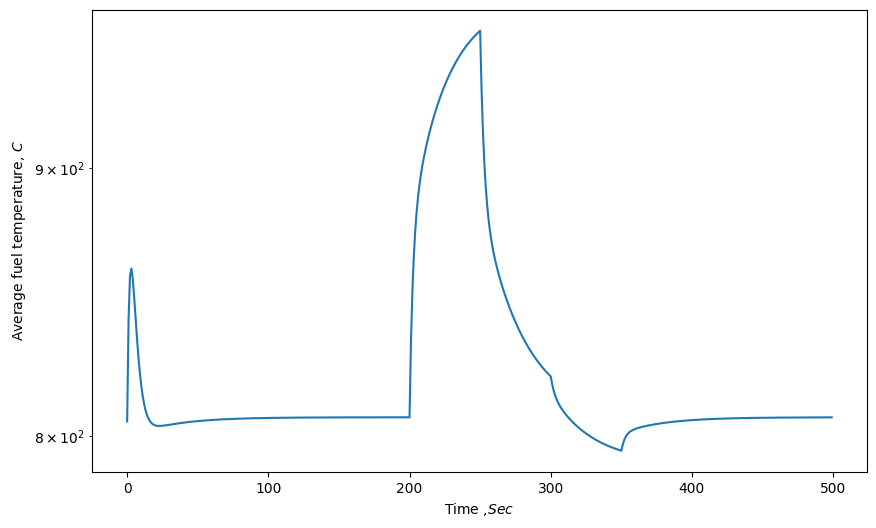

In [34]:

plt.figure(figsize=(10,6))
plt.plot (TEMP/5-273.16)
plt.yscale('log')
plt.xlabel("Time ,$Sec$")
plt.ylabel(r"Average fuel temperature, $C$")

In [35]:
mod_temp=np.array(data1['Tmo1'])+np.array(data1['Tmo2'])+np.array(data1['Tmo3'])+np.array(data1['Tmo4'])+np.array(data1['Tmo5'])+np.array(data1['Tmo6'])+np.array(data1['Tmo7'])+np.array(data1['Tmo8'])+np.array(data1['Tmo9'])+np.array(data1['Tmo10'])
mod_temp=mod_temp/10



In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data1['T'],np.array(data1['Tf2'])-(np.array(data1['Tmo4'])/2+np.array(data1['Tmo3'])/2)-55)
plt.xlabel("Time ,$Sec$")
plt.ylabel("Transient temperature difference\n between 2nd fuel node and\n average temperature of \n 3rd and 4th moderator node \n $T_{f2}-(T_{mod3}+T_{mod4})/2$, \n $C$")


In [37]:
import pandas as pd
PATH='/media/ebny_walid/New Volume/Thesis/thesis_final_code/test_case_pressurizer.excel'
data=pd.read_excel(PATH)
data.head(-5)

,T,P,Lw
0,0.000000,1.500000e+07,8.562575
1,1.000002,1.500000e+07,9.283087
2,2.000004,1.500000e+07,8.352598
3,3.000006,1.500000e+07,7.629820
4,4.000008,1.500000e+07,7.073736
...,...,...,...
490,490.000980,1.500000e+07,5.384135
491,491.000982,1.500000e+07,5.384143
492,492.000984,1.500000e+07,5.384150
493,493.000986,1.500000e+07,5.384156


Text(0, 0.5, 'Sub cool region height $L_w$ $(m)$')

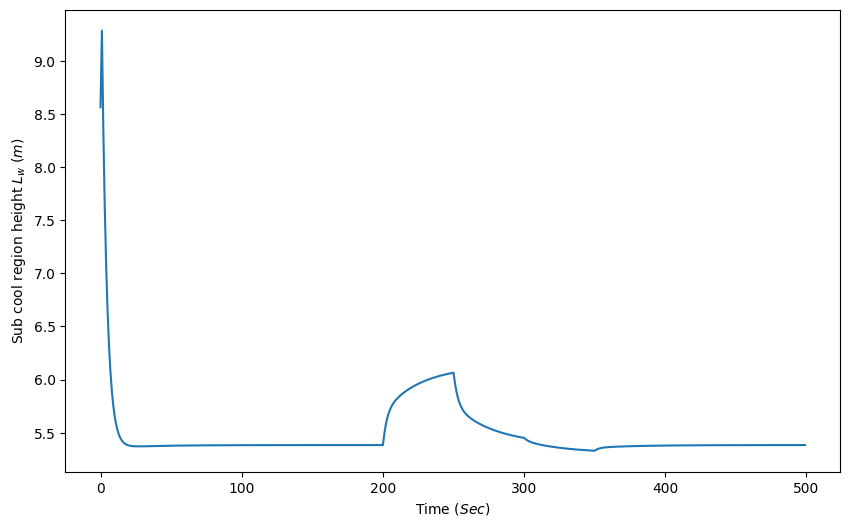

In [38]:

plt.figure(figsize=(10,6))
plt.plot(data['T'],data['Lw'])
plt.xlabel("Time $(Sec)$")
plt.ylabel("Sub cool region height $L_w$ $(m)$")

Text(0, 0.5, '$P_{pressurizer}$ $(Pa)$')

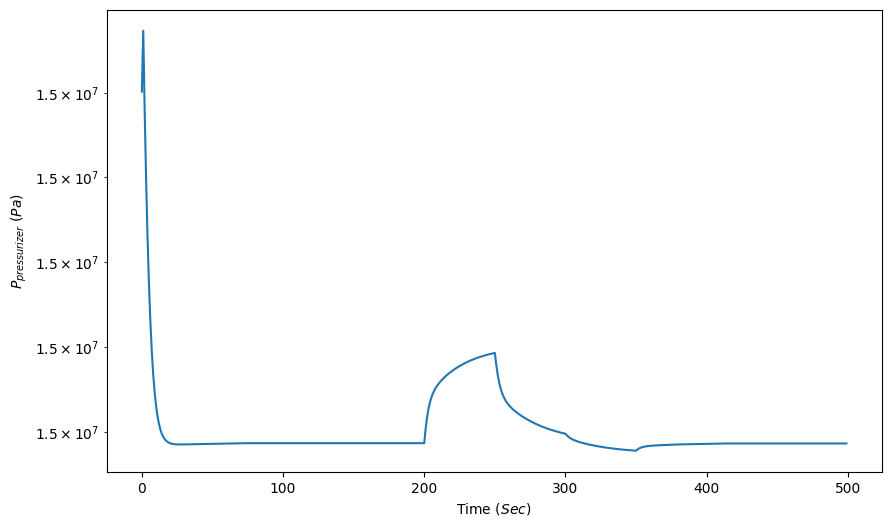

In [40]:
plt.figure(figsize=(10,6))
plt.plot(data['T'],data['P'])
plt.yscale('log')
plt.xlabel(r"Time $(Sec)$")
plt.ylabel(r"$P_{pressurizer}$ $(Pa)$")